# **Name- Mrityunjay Joshi**
# **Project- "Employee Salary Prediction( ML )**

⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️

### **Import Libraries:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

### **Import & Read File:**

In [2]:
data=pd.read_csv('Dataset09-Employee-salary-prediction.csv')

In [3]:
data.index

RangeIndex(start=0, stop=375, step=1)

In [4]:
data.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [5]:
print(data.shape)

(375, 6)


In [6]:
data.head(4)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0


In [7]:
data.tail(3)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0
374,44.0,Female,PhD,Senior Business Analyst,15.0,150000.0


### **Data Modifying & Cleaning:**

In [8]:
data.columns=['Age','Gender','Degree','Job Title','Experience Years','Salary']

In [9]:
data.dtypes

Age                 float64
Gender               object
Degree               object
Job Title            object
Experience Years    float64
Salary              float64
dtype: object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               373 non-null    float64
 1   Gender            373 non-null    object 
 2   Degree            373 non-null    object 
 3   Job Title         373 non-null    object 
 4   Experience Years  373 non-null    float64
 5   Salary            373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [11]:
data.duplicated().value_counts()  # How many duplicates ?

False    325
True      50
Name: count, dtype: int64

In [12]:
data.drop_duplicates(keep='first',inplace=True)

In [13]:
data.duplicated().value_counts()

False    325
Name: count, dtype: int64

In [14]:
data.isnull().sum()    # Check Null Values

Age                 1
Gender              1
Degree              1
Job Title           1
Experience Years    1
Salary              1
dtype: int64

In [15]:
data.dropna(how='all',inplace=True)    # Remove Null Values

In [16]:
data.isnull().sum()

Age                 0
Gender              0
Degree              0
Job Title           0
Experience Years    0
Salary              0
dtype: int64

In [17]:
data.shape

(324, 6)

In [18]:
data.describe()   #Descriptive statistics 

,Age,Experience Years,Salary
count,324.000000,324.000000,324.000000
mean,37.382716,10.058642,99985.648148
std,7.185844,6.650470,48652.271440
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.500000,9.000000,95000.000000
75%,44.000000,16.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [19]:
data.describe(include=object)

,Gender,Degree,Job Title
count,324,324,324
unique,2,3,174
top,Male,Bachelor's,Director of Operations
freq,170,191,9


### **Find Relations & Visualizations**:

In [20]:
data.head(3)

,Age,Gender,Degree,Job Title,Experience Years,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0


In [21]:
data.corr(numeric_only=True)

,Age,Experience Years,Salary
Age,1.000000,0.979192,0.916543
Experience Years,0.979192,1.000000,0.924455
Salary,0.916543,0.924455,1.000000


In [22]:
sns.set(style="darkgrid")

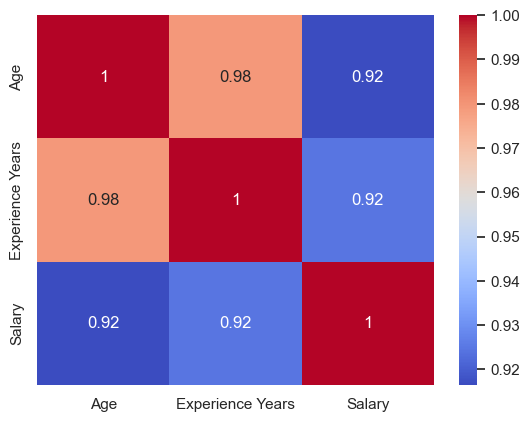

In [23]:
sns.heatmap(data.corr(numeric_only=True),cmap='coolwarm',annot=True);

In [24]:
data.head(3)

,Age,Gender,Degree,Job Title,Experience Years,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0


In [25]:
gr=data.groupby(['Degree'])['Degree'].count().reset_index(name='count').sort_values(by='count',ascending=False)

In [26]:
gr

,Degree,count
0,Bachelor's,191
1,Master's,91
2,PhD,42


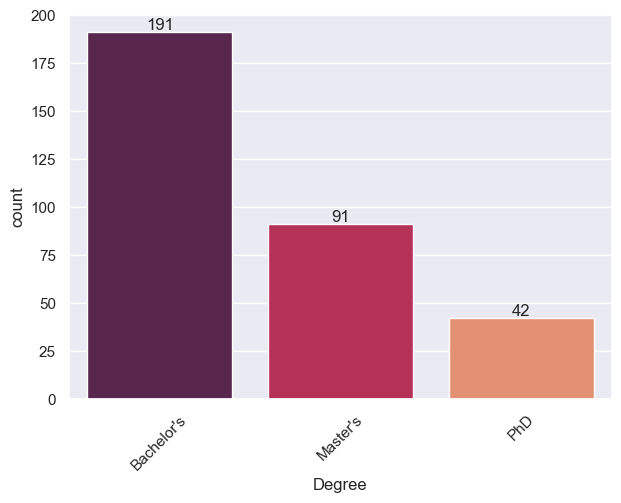

In [27]:
plt.figure(figsize=(7, 5))
ax=sns.countplot(x='Degree',data=data,palette='rocket')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=45);

In [28]:
gr=data.groupby(['Job Title'])['Job Title'].count().reset_index(name='count').sort_values(by='count',ascending=False)

In [29]:
gr.head()

,Job Title,count
30,Director of Operations,9
29,Director of Marketing,8
134,Senior Marketing Manager,8
144,Senior Project Manager,7
110,Senior Business Analyst,6


In [30]:
gr.count()

Job Title    174
count        174
dtype: int64

In [31]:
pd.unique(data['Job Title'])

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [32]:
data['Gender'].value_counts()

Gender
Male      170
Female    154
Name: count, dtype: int64

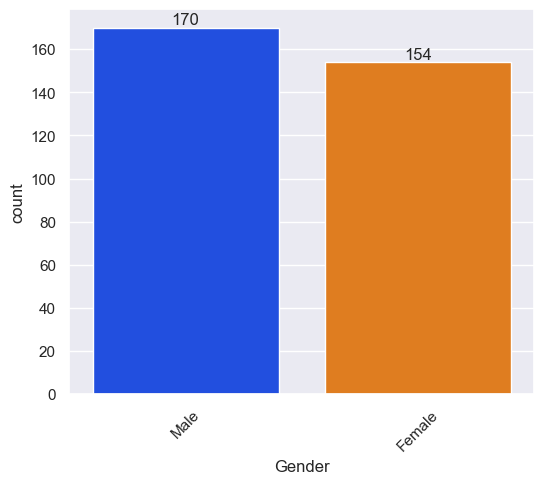

In [33]:
plt.figure(figsize=(6, 5))
ax=sns.countplot(x='Gender',data=data,palette='bright')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=45);

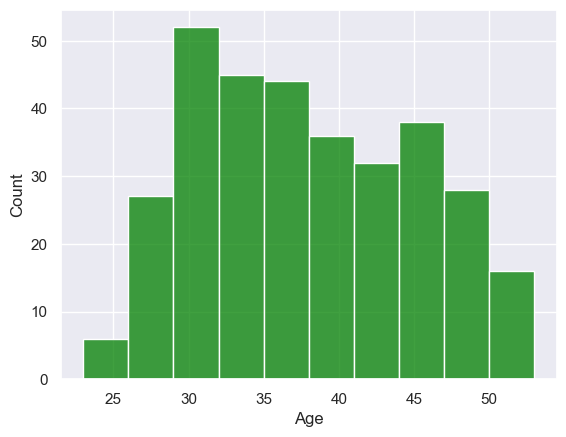

In [34]:
sns.histplot(data['Age'],color='green');

In [35]:
#inferno

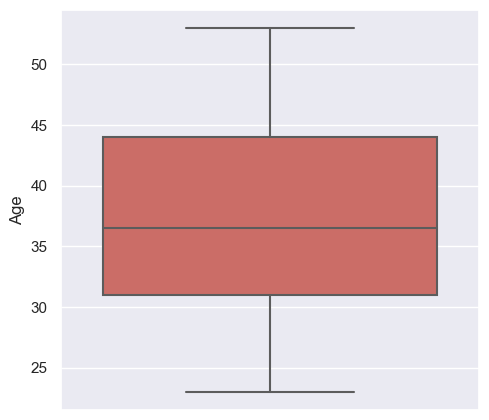

In [36]:
plt.figure(figsize=(5.4, 5.2))
sns.boxplot(y=data['Age'],palette='hls');

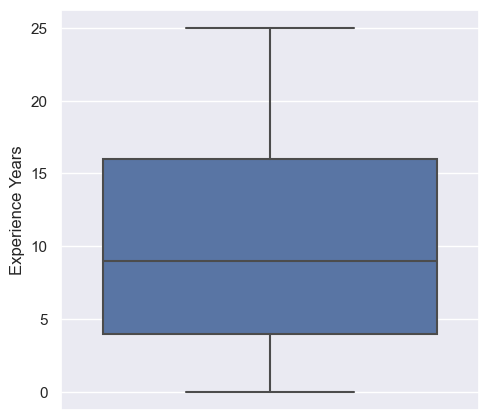

In [37]:
plt.figure(figsize=(5.4, 5.2))
sns.boxplot(y=data['Experience Years'],palette='deep');

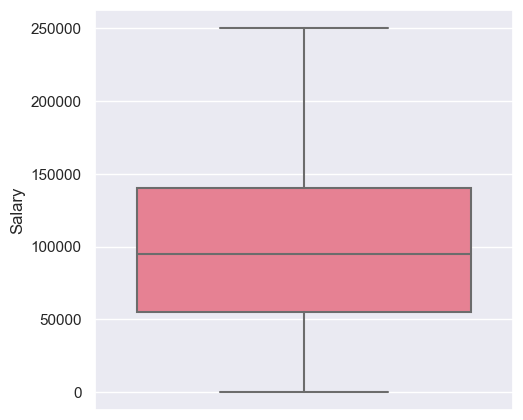

In [38]:
plt.figure(figsize=(5.4, 5.2))
sns.boxplot(y='Salary',data=data,palette='husl');

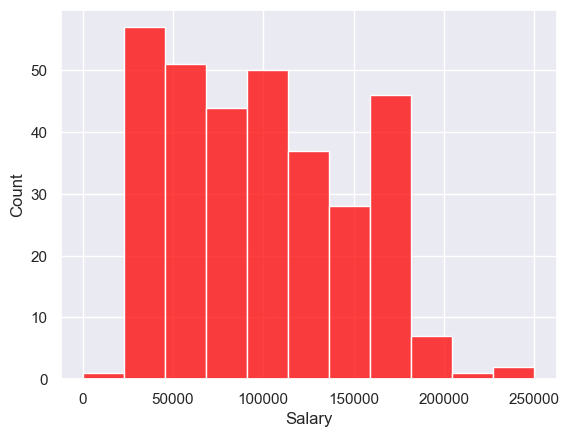

In [39]:
sns.histplot(x='Salary',data=data,color='red');

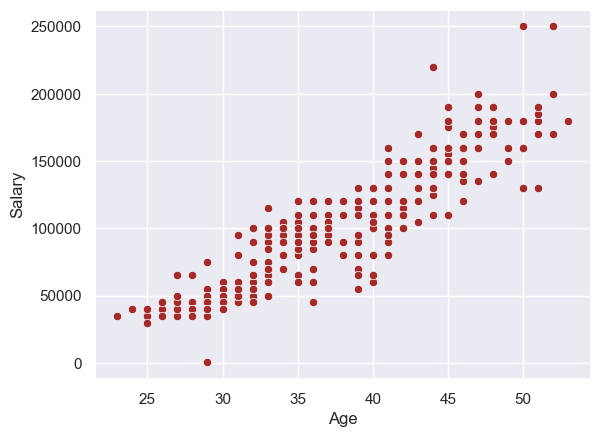

In [40]:
sns.scatterplot(x=data['Age'],y=data['Salary'],color='brown');

C:\Users\19mri\anaconda4\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


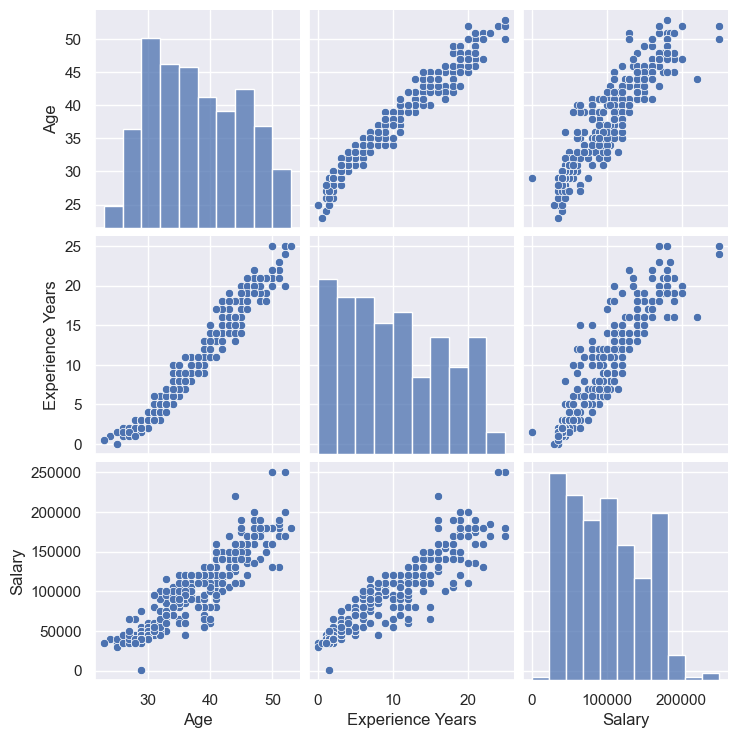

In [41]:
sns.pairplot(data=data)

In [42]:
data.head(4)

,Age,Gender,Degree,Job Title,Experience Years,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0


### **Label Encoding:**

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
label_Encoder=LabelEncoder()

In [45]:
label_Encoder

LabelEncoder()

In [46]:
data['Gender_Encode']=label_Encoder.fit_transform(data['Gender'])

In [47]:
data['Degree_Encode']=label_Encoder.fit_transform(data['Degree'])

In [48]:
data['Job_Title_Encode']=label_Encoder.fit_transform(data['Job Title'])

In [49]:
data.head(4)

,Age,Gender,Degree,Job Title,Experience Years,Salary,Gender_Encode,Degree_Encode,Job_Title_Encode
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,130
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,101


### **Feature Scalling:**

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
std_scaler=StandardScaler()

In [52]:
std_scaler

StandardScaler()

In [53]:
data['Age_Scaled']=std_scaler.fit_transform(data[['Age']])

In [54]:
data['Experience Years_Scaled']=std_scaler.fit_transform(data[['Experience Years']])

In [55]:
data.head(3)

,Age,Gender,Degree,Job Title,Experience Years,Salary,Gender_Encode,Degree_Encode,Job_Title_Encode,Age_Scaled,Experience Years_Scaled
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159,-0.750231,-0.761821
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17,-1.307742,-1.063017
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,130,1.061680,0.744158


### **Independent & Dependent Features:**

In [56]:
X=data.iloc[:,[6,7,8,9,10]]
y=data['Salary']

In [57]:
X.head()

,Gender_Encode,Degree_Encode,Job_Title_Encode,Age_Scaled,Experience Years_Scaled
0,1,0,159,-0.750231,-0.761821
1,0,1,17,-1.307742,-1.063017
2,1,2,130,1.061680,0.744158
3,0,0,101,-0.192720,-0.460625
4,1,1,22,2.037324,1.497148


### **Split Data Into Train & Test:**

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [60]:
x_train.shape,y_train.shape  # 80% data

((259, 5), (259,))

In [61]:
x_test.shape,y_test.shape # 20% data

((65, 5), (65,))

### **Model Development:**

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
model=linear_model.LinearRegression()

In [64]:
model.fit(x_train,y_train)  #Model Tranning

LinearRegression()

In [65]:
y_predict=model.predict(x_test)   # Model Prediction

In [66]:
y_predict

array([117415.91344602, 125562.80742759,  48965.15386167, 128739.34887988,
       106828.49930535,  99654.76748821,  49101.27883652,  57130.71108104,
       166333.69009266,  43112.61060113,  40544.18249367, 122553.217185  ,
       107631.15450849, 155580.48335296,  83652.23602446, 170890.28450906,
        98984.50106226, 109338.33008328,  42267.86835535,  48089.87647812,
        75674.93528581,  64499.29874156,  63619.2494321 ,  31543.41552147,
       188376.92844437,  90340.76921722, 155285.91529198, 160863.57809872,
       185183.73163709,  34741.26224478, 124850.6230462 , 165106.94121634,
        87085.00622186, 155425.69514031, 149190.25441885,  45729.74800187,
        88475.39474629,  92025.62668073,  97997.32557607,  40411.112659  ,
        89995.79796521,  53873.21977084, 108677.48549927,  54590.96778663,
        36497.92729223,  48611.85493217, 129193.72126941,  43102.58902589,
       162383.16672117,  81874.95829259, 157771.0301154 ,  43984.89040816,
        59950.21740617,  

### **Comparision:**

In [67]:
df = pd.DataFrame({'Original Salary': y_test, 'Predicted Salary': y_predict})

In [68]:
df

,Original Salary,Predicted Salary
132,100000.0,117415.913446
108,100000.0,125562.807428
137,50000.0,48965.153862
9,110000.0,128739.348880
181,105000.0,106828.499305
...,...,...
104,80000.0,117279.788471
233,85000.0,83396.821876
60,170000.0,177743.761029
94,75000.0,72275.144274


### **Check Errors:**

In [69]:
df['errors']=df['Original Salary']-df['Predicted Salary']

In [70]:
df

,Original Salary,Predicted Salary,errors
132,100000.0,117415.913446,-17415.913446
108,100000.0,125562.807428,-25562.807428
137,50000.0,48965.153862,1034.846138
9,110000.0,128739.348880,-18739.348880
181,105000.0,106828.499305,-1828.499305
...,...,...,...
104,80000.0,117279.788471,-37279.788471
233,85000.0,83396.821876,1603.178124
60,170000.0,177743.761029,-7743.761029
94,75000.0,72275.144274,2724.855726


### **Sum of squared errors (SSE):  &  The mean squared error (MSE)**

In [71]:
Q=df['errors']*df['errors']

In [72]:
SSE=Q.sum()

In [73]:
SSE

13374018821.622133

In [74]:
df.shape

(65, 3)

In [75]:
MSE=SSE/65

In [76]:
MSE

205754135.71726358

### **Coef & Intercept:**

In [77]:
model.coef_

array([7.38907834e+03, 1.54227359e+04, 1.95769562e+01, 2.01818940e+04,
       1.92043082e+04])

In [78]:
model.intercept_

86001.49320552872

### **Check Model ACCURACY:**

In [79]:
from sklearn.metrics import r2_score

In [80]:
r2=r2_score(df['Original Salary'],df['Predicted Salary'])

In [81]:
r2

0.8911231066517076

## 89.2 % ACCURACY OF THIS MODEL.....  (SUPER MODEL)

🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍

### **Solving Real Problem:**

➡️ **Name= MOHIT**

➡️ **Age= 49**

➡️ **Gender= F(0)**

➡️ **Degree =PHD (2)**

➡️ **Job= Director(22)**

➡️ **Exp.Year= 15**

➡️ **Salary ❓**

In [82]:
data.head(2)

,Age,Gender,Degree,Job Title,Experience Years,Salary,Gender_Encode,Degree_Encode,Job_Title_Encode,Age_Scaled,Experience Years_Scaled
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159,-0.750231,-0.761821
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17,-1.307742,-1.063017


In [83]:
AGE=std_scaler.transform([[49]])
AGE

C:\Users\19mri\anaconda4\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[5.86448677]])

In [84]:
Experience_Years=std_scaler.transform([[15]])
Experience_Years

C:\Users\19mri\anaconda4\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.74415815]])

### **FINALLY PREDICT SALARY____________________________________________________________________________**

In [85]:
print(model.predict([[0,2,22,5.86448677,0.74415815]]),'is the Salary of This Employee>>>>>>>>>>>>>>>')

[249925.15061727] is the Salary of This Employee>>>>>>>>>>>>>>>


C:\Users\19mri\anaconda4\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️⬆️